<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk28_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN** is a simple, instance-based learning algorithm used for classification or regression. It predicts the class or value of a new data point by finding the k closest data points (neighbors) in the training set based on a distance metric (usually Euclidean distance) and making a decision based on majority voting (for classification) or averaging (for regression).

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [ ]:
# Your code goes here

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=17cbDNBmys04MJqQfrma3jd72VPMnxIq0'


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
X.shape

(214, 9)

In [ ]:
y.shape

(214,)

In [ ]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.84623746, -0.74467528,  0.52636164, ..., -0.68807645,
        -0.33761134, -0.60110996],
       [ 0.28077633,  0.33413832,  0.54088841, ..., -0.03692037,
        -0.04564469,  1.78472688],
       [-0.0992632 ,  0.43938842, -2.03034913, ...,  1.44941417,
        -0.33761134, -0.60110996],
       ...,
       [-0.85278986, -0.34998738,  0.44646443, ..., -0.39080954,
        -0.33761134,  1.28767753],
       [ 0.0121277 ,  0.92617017, -0.43966828, ...,  0.26742432,
        -0.33761134, -0.60110996],
       [-0.09271079, -1.00780055, -0.02565546, ...,  0.33820216,
        -0.33761134,  1.3870874 ]])

# Train and evaluate the KNeighborsClassifier using the brute algorithm, testing different k values (number of neighbors) and p values (distance metric: p=1 for Manhattan, p=2 for Euclidean) to compare results.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define k values and p values to test
k_values = [1, 3, 5, 7, 9, 11]
p_values = [1, 1.3, 1.5, 1.7, 2]  # p=1 (Manhattan), p=2 (Euclidean)

# Store accuracies for plotting
accuracy_results = {p: [] for p in p_values}

# Loop through k and p values
for k in k_values:
    for p in p_values:
        # Initialize KNN with brute algorithm
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', p=p)
        # Train model
        knn.fit(X_train_scaled, y_train)
        # Predict on test set
        y_pred = knn.predict(X_test_scaled)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[p].append(accuracy)
        print(f"k={k}, p={p}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
for p in p_values:
    plt.plot(k_values, accuracy_results[p], marker='o', label=f'p={p}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k for Different p Values')
plt.legend()
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')

k=1, p=1, Accuracy: 0.7907
k=1, p=1.3, Accuracy: 0.7674
k=1, p=1.5, Accuracy: 0.7907
k=1, p=1.7, Accuracy: 0.7907
k=1, p=2, Accuracy: 0.7674
k=3, p=1, Accuracy: 0.7674
k=3, p=1.3, Accuracy: 0.7674
k=3, p=1.5, Accuracy: 0.7907
k=3, p=1.7, Accuracy: 0.7907
k=3, p=2, Accuracy: 0.8140
k=5, p=1, Accuracy: 0.7907
k=5, p=1.3, Accuracy: 0.7674
k=5, p=1.5, Accuracy: 0.7209
k=5, p=1.7, Accuracy: 0.6977
k=5, p=2, Accuracy: 0.6977
k=7, p=1, Accuracy: 0.7209
k=7, p=1.3, Accuracy: 0.7209
k=7, p=1.5, Accuracy: 0.7209
k=7, p=1.7, Accuracy: 0.7209
k=7, p=2, Accuracy: 0.7209
k=9, p=1, Accuracy: 0.6977
k=9, p=1.3, Accuracy: 0.7209
k=9, p=1.5, Accuracy: 0.7209
k=9, p=1.7, Accuracy: 0.6977
k=9, p=2, Accuracy: 0.6744
k=11, p=1, Accuracy: 0.6977
k=11, p=1.3, Accuracy: 0.6977
k=11, p=1.5, Accuracy: 0.6512
k=11, p=1.7, Accuracy: 0.6279
k=11, p=2, Accuracy: 0.6279


# **Key Question:** Are the Results (k=3, p=2, Accuracy=0.8140) True or Random Noise?
# In regression, statistical tests (e.g., t-tests, F-tests, p-values) help determine if the model’s predictions are statistically significant or due to noise. For classification tasks like KNN, we don’t typically use the same statistical tests because KNN is a non-parametric algorithm (it doesn’t assume a specific data distribution or model parameters). Instead, we rely on techniques like **cross-validation**, **permutation tests**, **stability analysis**, and evaluation metrics to assess whether the model’s performance is robust and not due to random chance. Below, I’ll explain these methods in detail and apply them to your case to determine if k=3, p=2 is a reliable result.


# **1. Use Cross-Validation to Assess Model Stability**


# **Why?** Your current accuracy (0.8140) is based on a single train-test split, which might be sensitive to how the data was split. If the split is lucky (or unlucky), the accuracy might not reflect the model’s true performance. Cross-validation (CV) trains and tests the model on multiple splits of the data to give a more robust estimate of performance and checks if the result is consistent.

## **How?** Use k-fold cross-validation (e.g., 5-fold or 10-fold) to evaluate the model with k=3, p=2. This splits the data into k folds, trains on k-1 folds, and tests on the remaining fold, repeating k times to average the results.
**What to Look For? If the cross-validation accuracy is close to 0.8140 with low variance, it suggests the result is stable and not due to a lucky split. A high variance or much lower average accuracy might indicate overfitting or noise.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracies: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracies: [0.51428571 0.70588235 0.73529412 0.64705882 0.61764706]
Mean Accuracy: 0.6440
Standard Deviation: 0.0771


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf)
print(f"Stratified 5-Fold CV Accuracies: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Stratified 5-Fold CV Accuracies: [0.62857143 0.70588235 0.79411765 0.58823529 0.67647059]
Mean Accuracy: 0.6787
Standard Deviation: 0.0704


# **the mean accuracy is not close to 0.8140 (e.g., ~0.78–0.82) and the standard deviation isnt low (e.g., <0.05), it means the model’s performance isnt consistent across different data splits, indicating the result is likely due to noise.**
# mean is much lower (e.g., <0.75) or the standard deviation is high

# **Permutation Test:**

In [ ]:
n_permutations = 1000
perm_accuracies = []
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
original_accuracy = 0.8140  # Your test accuracy

for _ in range(n_permutations):
    y_train_permuted = np.random.permutation(y_train)
    knn.fit(X_train_scaled, y_train_permuted)
    y_pred = knn.predict(X_test_scaled)
    perm_accuracies.append(accuracy_score(y_test, y_pred))

p_value = np.mean(np.array(perm_accuracies) >= original_accuracy)
print(f"Permutation Test p-value: {p_value:.4f}")

Permutation Test p-value: 0.0000


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
knn.fit(X_train_scaled, y_train)
train_pred = knn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: 0.8140")

Training Accuracy: 0.8246
Test Accuracy: 0.8140


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute', p=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.79      0.79      0.79        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **With KD-Tree**

k=1, p=1, Accuracy: 0.7907
k=1, p=1.3, Accuracy: 0.7674
k=1, p=1.5, Accuracy: 0.7907
k=1, p=1.7, Accuracy: 0.7907
k=1, p=2, Accuracy: 0.7674
k=1, p=2.5, Accuracy: 0.7674
k=3, p=1, Accuracy: 0.7674
k=3, p=1.3, Accuracy: 0.7674
k=3, p=1.5, Accuracy: 0.7907
k=3, p=1.7, Accuracy: 0.7907
k=3, p=2, Accuracy: 0.8140
k=3, p=2.5, Accuracy: 0.7442
k=5, p=1, Accuracy: 0.7907
k=5, p=1.3, Accuracy: 0.7674
k=5, p=1.5, Accuracy: 0.7209
k=5, p=1.7, Accuracy: 0.6977
k=5, p=2, Accuracy: 0.6977
k=5, p=2.5, Accuracy: 0.6512
k=7, p=1, Accuracy: 0.7209
k=7, p=1.3, Accuracy: 0.7209
k=7, p=1.5, Accuracy: 0.7209
k=7, p=1.7, Accuracy: 0.7209
k=7, p=2, Accuracy: 0.7209
k=7, p=2.5, Accuracy: 0.6977
k=9, p=1, Accuracy: 0.6977
k=9, p=1.3, Accuracy: 0.7209
k=9, p=1.5, Accuracy: 0.7209
k=9, p=1.7, Accuracy: 0.6977
k=9, p=2, Accuracy: 0.6744
k=9, p=2.5, Accuracy: 0.6512
k=11, p=1, Accuracy: 0.6977
k=11, p=1.3, Accuracy: 0.6977
k=11, p=1.5, Accuracy: 0.6512
k=11, p=1.7, Accuracy: 0.6279
k=11, p=2, Accuracy: 0.6279
k=11

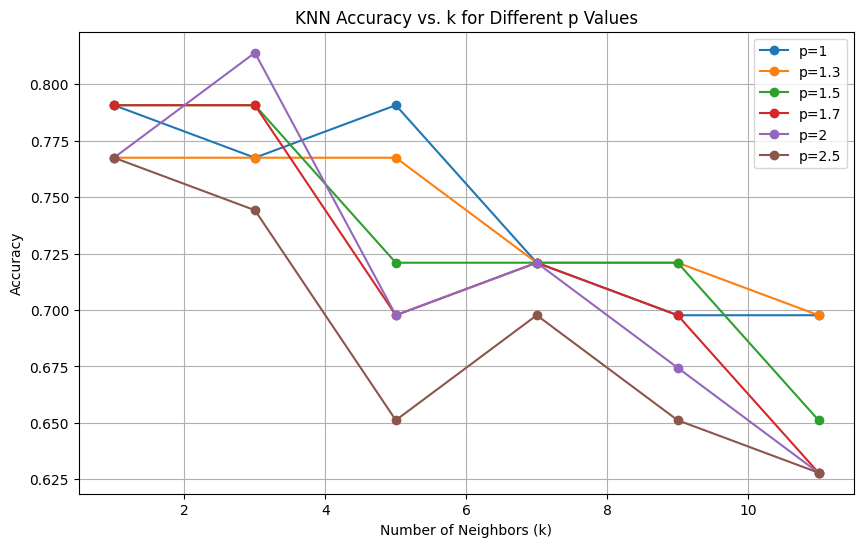

In [ ]:
# Define k values and p values to test
k_values = [1, 3, 5, 7, 9, 11]
p_values = [1, 1.3, 1.5, 1.7, 2, 2.5]  # p=1 (Manhattan), p=2 (Euclidean)

# Store accuracies for plotting
accuracy_results = {p: [] for p in p_values}

# Loop through k and p values
for k in k_values:
    for p in p_values:
        # Initialize KNN with brute algorithm
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', p=p)
        # Train model
        knn.fit(X_train_scaled, y_train)
        # Predict on test set
        y_pred = knn.predict(X_test_scaled)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[p].append(accuracy)
        print(f"k={k}, p={p}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
for p in p_values:
    plt.plot(k_values, accuracy_results[p], marker='o', label=f'p={p}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k for Different p Values')
plt.legend()
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', p=2)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracies: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracies: [0.51428571 0.70588235 0.73529412 0.64705882 0.61764706]
Mean Accuracy: 0.6440
Standard Deviation: 0.0771


# **With BALL TREE**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define k values and p values to test
k_values = [1, 3, 5, 7, 9, 11]
p_values = [1, 1.3, 1.5, 1.7, 2, 2.5]  # p=1 (Manhattan), p=2 (Euclidean)

# Store accuracies for plotting
accuracy_results = {p: [] for p in p_values}

# Loop through k and p values
for k in k_values:
    for p in p_values:
        # Initialize KNN with ball_tree algorithm
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree', p=p)
        # Train model
        knn.fit(X_train_scaled, y_train)
        # Predict on test set
        y_pred = knn.predict(X_test_scaled)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[p].append(accuracy)
        print(f"k={k}, p={p}, Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
for p in p_values:
    plt.plot(k_values, accuracy_results[p], marker='o', label=f'p={p}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k for Different p Values (Ball Tree)')
plt.legend()
plt.grid(True)
plt.savefig('knn_ball_tree_accuracy_plot.png')

k=1, p=1, Accuracy: 0.7907
k=1, p=1.3, Accuracy: 0.7674
k=1, p=1.5, Accuracy: 0.7907
k=1, p=1.7, Accuracy: 0.7907
k=1, p=2, Accuracy: 0.7674
k=1, p=2.5, Accuracy: 0.7674
k=3, p=1, Accuracy: 0.7674
k=3, p=1.3, Accuracy: 0.7674
k=3, p=1.5, Accuracy: 0.7907
k=3, p=1.7, Accuracy: 0.7907
k=3, p=2, Accuracy: 0.8140
k=3, p=2.5, Accuracy: 0.7442
k=5, p=1, Accuracy: 0.7907
k=5, p=1.3, Accuracy: 0.7674
k=5, p=1.5, Accuracy: 0.7209
k=5, p=1.7, Accuracy: 0.6977
k=5, p=2, Accuracy: 0.6977
k=5, p=2.5, Accuracy: 0.6512
k=7, p=1, Accuracy: 0.7209
k=7, p=1.3, Accuracy: 0.7209
k=7, p=1.5, Accuracy: 0.7209
k=7, p=1.7, Accuracy: 0.7209
k=7, p=2, Accuracy: 0.7209
k=7, p=2.5, Accuracy: 0.6977
k=9, p=1, Accuracy: 0.6977
k=9, p=1.3, Accuracy: 0.7209
k=9, p=1.5, Accuracy: 0.7209
k=9, p=1.7, Accuracy: 0.6977
k=9, p=2, Accuracy: 0.6744
k=9, p=2.5, Accuracy: 0.6512
k=11, p=1, Accuracy: 0.6977
k=11, p=1.3, Accuracy: 0.6977
k=11, p=1.5, Accuracy: 0.6512
k=11, p=1.7, Accuracy: 0.6279
k=11, p=2, Accuracy: 0.6279
k=11

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', p=2)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracies: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Accuracies: [0.51428571 0.70588235 0.73529412 0.64705882 0.61764706]
Mean Accuracy: 0.6440
Standard Deviation: 0.0771
